# Task 1.1: Prediction with RNN

In [1]:
from src.load_data import get_data
from src.train import FederatedLearning
from src.config import Config, load_train_config

import torch
torch.manual_seed(101)

## Specify parameters

### Manually set config

In [2]:
kwargs = {
    # Main mode
    "mode": "prediction",

    # Model config
    "model": "RNN",  # LSTM or RNN
    # "hidden_dim": 32,
    "num_layers": 1,
    "dropout": 0.0,

    # Training config
    "epochs": 300,
    "lr": 0.01,
    "batch_size": 128
}

config = Config(**kwargs)

In [3]:
# Save config
# config.save("default_pred_rnn")

### Load saved config

In [4]:
config = load_train_config("config_default_pred_rnn")
print(config)

Config loaded from: config/config_default_pred_rnn.json
CONFIG:
  mode: prediction
  test_size: 0.2
  val_size: 0.1
  shuffle: True
  seed: 42
  model: RNN
  input_dim: 1
  hidden_dim: 32
  output_dim: 1
  num_layers: 1
  dropout: 0.0
  epochs: 300
  lr: 0.3
  batch_size: 128
  eval_steps: 50


## Run FL training

In [5]:
x_train, x_val, x_test, y_train, y_val, y_test = get_data(config)

In [6]:
fl = FederatedLearning(config)
fl.train(x_train, y_train, x_val, y_val)

TRAIN:
  Epoch: 1,  train loss: 151.38094, val loss: 523.82166
  Epoch: 50,  train loss: 62.12696, val loss: 98.53953
  Epoch: 100,  train loss: 91.73045, val loss: 102.27944
  Epoch: 150,  train loss: 54.48639, val loss: 92.80247
  Epoch: 200,  train loss: 134.62042, val loss: 116.79372
  Epoch: 250,  train loss: 42.79272, val loss: 86.51598
  Epoch: 300,  train loss: 45.35020, val loss: 87.91235
  Needed  0.46 minutes for training


### Analysis

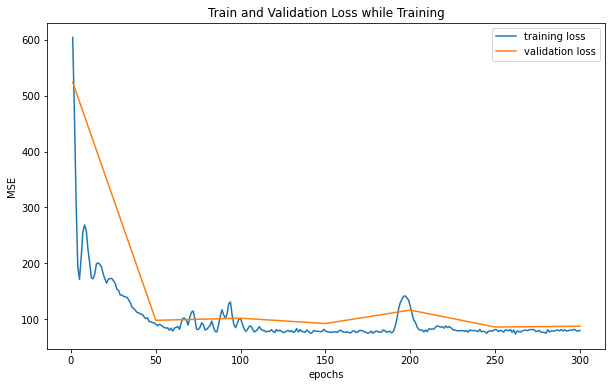

In [7]:
fl.plot_training_loss()

In [ ]:
# TODO add "simulation plot": "show the predicted output vs. ground truth during the model training and testing"

In [9]:
fl.evaluation_metrics(x_test, y_test)

METRICS:
  Test MSE: 87.5280532836914


## Run training with aggregated data

In [10]:
x_train, x_val, x_test, y_train, y_val, y_test = get_data(config)

# Stack data to aggregate all households to one
x_train, x_val, x_test = [arr.reshape(1, arr.shape[0] * arr.shape[1], arr.shape[2]) for arr in [x_train, x_val, x_test]]
y_train, y_val, y_test = [arr.reshape(1, arr.shape[0] * arr.shape[1]) for arr in [y_train, y_val, y_test]]

In [11]:
fl_agg = FederatedLearning(config)
fl_agg.train(x_train, y_train, x_val, y_val)

TRAIN:
  Epoch: 1,  train loss: 570.33069, val loss: 552.53766
  Epoch: 50,  train loss: 63.62117, val loss: 91.74498
  Epoch: 100,  train loss: 97.91523, val loss: 94.05328
  Epoch: 150,  train loss: 122.61447, val loss: 136.35631
  Epoch: 200,  train loss: 80.66634, val loss: 90.09995
  Epoch: 250,  train loss: 71.66708, val loss: 109.73349
  Epoch: 300,  train loss: 80.23418, val loss: 91.21383
  Needed  0.01 minutes for training


### Analysis

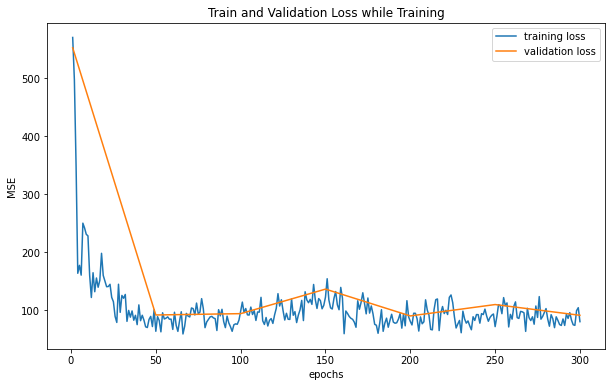

In [12]:
fl_agg.plot_training_loss()

In [13]:
fl_agg.evaluation_metrics(x_test, y_test)

METRICS:
  Test MSE: 94.13646697998047
